<a href="https://colab.research.google.com/github/Masoud0389/Steady_State/blob/main/MLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [139]:
data = pd.read_csv("DATASET.csv")
data = data.iloc[0:96, :]

In [140]:
y = np.arange(0, 96)
y = y*0
for i in range(84, 96):
  y[i] = 1
y = pd.DataFrame(y)

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 0)

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
X_train_scaled = normalize(X_train, norm = 'max')
X_test_scaled = normalize(X_test, norm = 'max')
X_tr = normalize(X_train_scaled, norm = 'max')
X_te = normalize(X_test_scaled, norm = 'max')
X_te = pd.DataFrame(X_te)
X_tr = pd.DataFrame(X_tr)

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, whiten= True)
X_train_principal = pca.fit_transform(X_tr)
X_train_principal = pd.DataFrame(X_tr)
X_test_principal = pca.fit_transform(X_te)
X_test_principal = pd.DataFrame(X_te)

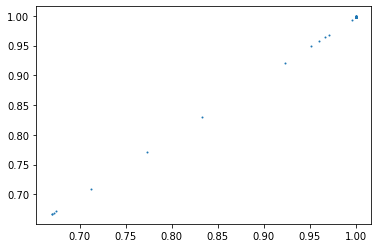

In [144]:
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1], s = 1 , alpha=1)

In [145]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_principal, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [146]:
y_pred = classifier.predict(X_test_principal)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
classifier.score(X_test_principal, y_pred)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
[prec, rec, f1, n] = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision is: ', prec)
print('Accuracy is: ', acc)
print('Recall is: ', rec)
print('F1_Score is: ', f1)

Precision is:  1.0
Accuracy is:  0.95
Recall is:  0.5
F1_Score is:  0.6666666666666666
